## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.random(100)
y = 13.14 * x + 5 + np.random.randint(-5,5,100)
x_train, y_train = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [2]:
#模型的预测准确度得分
print(reg.score(x_train,y_train))

0.6930223304468446


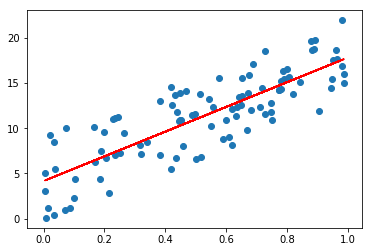

In [3]:
#可视化操作
y_pred = reg.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, color='red')

In [4]:
#预测新的数据点
reg.predict([[1.3]])

array([[21.86626135]])

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

In [5]:
def knn(x, y):
  return [(xi, yi) for xi, yi in zip(x,y)]

In [6]:
def distance(x1, x2):
  return abs(x1-x2)

In [7]:
from collections import Counter
def predict(x, k=5):
  most_similars = sorted(knn(x_train, y_train), key=lambda xi:distance(x,xi[0]))[:k]
  y_hat = [y_ for x_, y_ in most_similars]
  return np.mean(y_hat)

In [8]:
#使用LinearRegression/knn预测新数据
for i in range(10):
  x_test = np.random.random()
  print(i)
  print("Predict {:.2f} using LinearRegression:{:.2f}".format(x_test, reg.predict([[x_test]])[0][0]))
  print("Predict {:.2f} using KNN:{:.2f}".format(x_test, predict(x_test)))
  print('\n')


0
Predict 0.87 using LinearRegression:16.08
Predict 0.87 using KNN:17.69


1
Predict 0.67 using LinearRegression:13.26
Predict 0.67 using KNN:13.41


2
Predict 0.72 using LinearRegression:13.98
Predict 0.72 using KNN:13.95


3
Predict 0.22 using LinearRegression:7.20
Predict 0.22 using KNN:7.73


4
Predict 0.59 using LinearRegression:12.15
Predict 0.59 using KNN:11.31


5
Predict 0.59 using LinearRegression:12.19
Predict 0.59 using KNN:11.27


6
Predict 0.12 using LinearRegression:5.74
Predict 0.12 using KNN:3.74


7
Predict 0.50 using LinearRegression:10.94
Predict 0.50 using KNN:10.02


8
Predict 0.41 using LinearRegression:9.72
Predict 0.41 using KNN:11.85


9
Predict 0.46 using LinearRegression:10.38
Predict 0.46 using KNN:10.92





#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [9]:
import pandas as pd
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    #'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
data = pd.DataFrame(mock_data)

In [10]:
from collections import Counter
def entropy(elements):
  counter = Counter(elements)
  probs = []
  for e in set(elements):
    probs.append(counter[e] / len(elements))
  return -sum(p*np.log(p) for p in probs) 

In [11]:
entropy([1,2,0,1])

1.0397207708399179

In [12]:
data

,bought,family_number,gender,income
0,1,1,F,+10
1,1,1,F,-10
2,1,2,F,+10
3,0,1,F,+10
4,0,1,M,+10
5,0,1,M,+10
6,1,2,M,-10


In [13]:
def optimal_split(dataset, target):
  x_fields = set(dataset.columns.tolist()) - {target}
  spliter = None
  min_entropy = float('inf')

  for f in x_fields:
    values = set(dataset[f])
    if len(values) == 1:
      continue
    for v in values:
      sub_spliter1 = dataset[dataset[f] == v][target].tolist()
      sub_spliter2 = dataset[dataset[f] != v][target].tolist()
      entropy_v = entropy(sub_spliter1) + entropy(sub_spliter2)
      if entropy_v < min_entropy:
        min_entropy = entropy_v
        spliter = (f,v)
  # print("spliter:{0}, entropy:{1:.2f}".format(spliter, min_entropy))
  return min_entropy, spliter



In [14]:
optimal_split(data[data['income']=='-10'], 'bought')

(-0.0, ('gender', 'F'))

In [15]:
def split_all(dataset,target):
  datas = [dataset]
  spliters = []
  while datas:
    d = datas.pop(0)
    min_entropy, spliter = optimal_split(d, target)
    if min_entropy < 0.001 or min_entropy is float('inf'):
      continue
    if spliter is None:
      continue
    f, v = spliter
    spliters.append(spliter)
    dataset1 = d[d[f] == v]
    dataset2 = d[d[f] != v]
    print(d, '\n', 'Spliter:',spliter)
    if not dataset1.empty:

      datas.append(dataset1)
    if not dataset2.empty:

      datas.append(dataset2)
  return spliters

In [16]:
spliters = split_all(data, 'bought')

   bought  family_number gender income
0       1              1      F    +10
1       1              1      F    -10
2       1              2      F    +10
3       0              1      F    +10
4       0              1      M    +10
5       0              1      M    +10
6       1              2      M    -10 
 Spliter: ('income', '-10')
   bought  family_number gender income
0       1              1      F    +10
2       1              2      F    +10
3       0              1      F    +10
4       0              1      M    +10
5       0              1      M    +10 
 Spliter: ('family_number', 1)
   bought  family_number gender income
0       1              1      F    +10
3       0              1      F    +10
4       0              1      M    +10
5       0              1      M    +10 
 Spliter: ('gender', 'F')


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [17]:
from sklearn.cluster import KMeans

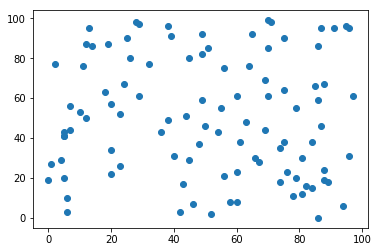

In [18]:
import random
x1 = [random.randint(0,100) for _ in range(100)]
x2 = [random.randint(0,100) for _ in range(100)]
plt.scatter(x1,x2)

In [19]:
data_train = list(zip(x1,x2))
cluster = KMeans(n_clusters=5, max_iter=500)
cluster.fit(data_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
cluster.cluster_centers_

array([[ 9.94444444, 34.83333333],
       [83.11111111, 22.22222222],
       [77.85714286, 78.33333333],
       [27.65      , 83.35      ],
       [52.26086957, 31.30434783]])

In [21]:
cluster.labels_

array([0, 4, 4, 3, 2, 2, 2, 3, 4, 2, 2, 0, 3, 1, 4, 4, 3, 4, 3, 2, 4, 2,
       0, 0, 1, 0, 0, 2, 1, 3, 4, 1, 1, 1, 3, 0, 2, 1, 0, 4, 3, 1, 0, 2,
       4, 2, 3, 3, 4, 0, 0, 3, 0, 4, 0, 3, 1, 4, 4, 0, 2, 1, 3, 1, 2, 4,
       4, 2, 2, 0, 0, 1, 1, 4, 1, 2, 2, 3, 4, 0, 1, 4, 3, 1, 1, 4, 3, 4,
       1, 0, 2, 3, 4, 2, 2, 4, 3, 3, 3, 2], dtype=int32)

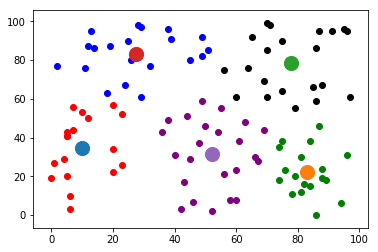

In [22]:
colors = ['red','green','black','blue','purple']
for i, (x, y) in enumerate(data_train):
  plt.scatter(x, y, c=colors[cluster.labels_[i]])

for (x, y) in cluster.cluster_centers_:
  plt.scatter(x, y, s=200)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:因为所有的模型都是对真实数据值的预测，无法完全反应真实世界的数据情况。但是，我们可以不断对模型进行优化，使得模型的预测不断接近真实世界的数据。在一定条件下，这些模型是有用的。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:欠拟合，是指模型无法准确预测训练集和测试集的数据。原因包括，训练集的数据量偏少，模型过于简单等。
过拟合，是指模型可以准确预测训练集的数据，但无法准确预测测试集的数据。原因包括：模型过于复杂，使得模型学习了训练集的所有特征（包括异常值的特征和数据集的误差）。

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

$ precision = \frac{TP}{TP + FP} $

$ recall = \frac{TP}{TP + FN} $

$ f \space score = (1 + \beta ^2）*\frac{precision * recall}{\beta * precision + recall} $

$ f1 \space score = 2*\frac{precision * recall}{precision + recall} $

$ f2 \space score = 5*\frac{precision * recall}{4 * precision + recall} $

AUC，即Area Under Curve，是指受试者工作曲线（ROC）下的面积。

精确率和召回率都是评判模型预测不平衡数据的指标。其中，用召回率评判是需要把数据中的正样本都尽可能准确预测出来；用精确率评判是预测为正样本的数据中，实际为正样本的数目要尽可能多。

F-Score同时考虑了精确率和召回率的影响。F1-Score中，精确率和召回率的影响因素一样；F2-Score中，精确率的权重更大。

AUC是为了解决在分类问题中，阈值设置对预测结果的影响。

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:机器学习是基于已知数据和模型，对未知的数据进行预测。其中，数据的多少、好坏直接影响了模型预测的准确度。传统的编程，是基于设置好的规则进行预测，不依赖于数据，也无法根据数据对预测结果进行修正。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

Ans:这句话是正确的。因为在机器学习中，不同的任务对评价指标的要求有着很大的不同。而能否选择正确的评价指标，对问题的研究和模型的评估至关重要。例如，在不平衡数据的分类问题中中，使用准确率（accuracy）就无法正确衡量模型的好坏。此时，使用precision或者recall才能对模型进行评估。而在医学检测肿瘤的问题中，为了使得所有病人都尽可能被检测出来，对于recall的要求就很高，而不会过多关注precision。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [23]:
print(spliters)
print(pd.DataFrame(mock_data))

[('income', '-10'), ('family_number', 1), ('gender', 'F')]
   bought  family_number gender income
0       1              1      F    +10
1       1              1      F    -10
2       1              2      F    +10
3       0              1      F    +10
4       0              1      M    +10
5       0              1      M    +10
6       1              2      M    -10


In [24]:
class DecisionTree:
  def __init__(self, feature = None, value = None, left=None, right=None, result=None):
    self.feature = feature
    self.value = value
    self.true = left
    self.false = right
    self.result = result

In [25]:
#build dicision tree based on optimal split
from collections import Counter
def build_tree(dataset,target):
    tree = DecisionTree(value = dataset)
    # features = set(dataset.columns.tolist()) - {target}
    min_entropy, spliter = optimal_split(dataset, target)
    if min_entropy <= 1e-3 or spliter is None :
        tree.result = Counter(tree.value[target]).most_common(1)[0][0]
        return tree
    f, v = spliter
    tree.feature = spliter
    dataset1 = dataset[dataset[f] == v]
    dataset2 = dataset[dataset[f] != v]
    tree.true = build_tree(dataset1, target)
    tree.false = build_tree(dataset2, target)
    return tree

#predict function based on decision tree
def predict(x_test, tree):
    if tree.result != None:
        return tree.result
    else:
        v = x_test[tree.feature[0]]
        branch = None
        if tree.feature[1] == v:
            branch = tree.true
        else: 
            branch = tree.false
    return predict(x_test, branch)


In [27]:
#print training dacision tree
dataset = pd.DataFrame(mock_data)
tree = build_tree(dataset,'bought')
stack = [tree]
while stack:
  t = stack.pop(0)
  print(t.value, '\n', t.feature, t.result)
  if t.true:
    stack.append(t.true)
  if t.false:
    stack.append(t.false)

   bought  family_number gender income
0       1              1      F    +10
1       1              1      F    -10
2       1              2      F    +10
3       0              1      F    +10
4       0              1      M    +10
5       0              1      M    +10
6       1              2      M    -10 
 ('income', '-10') None
   bought  family_number gender income
1       1              1      F    -10
6       1              2      M    -10 
 None 1
   bought  family_number gender income
0       1              1      F    +10
2       1              2      F    +10
3       0              1      F    +10
4       0              1      M    +10
5       0              1      M    +10 
 ('family_number', 1) None
   bought  family_number gender income
0       1              1      F    +10
3       0              1      F    +10
4       0              1      M    +10
5       0              1      M    +10 
 ('gender', 'F') None
   bought  family_number gender income
2       1         

In [28]:
import random
dataset = pd.DataFrame(mock_data)
tree = build_tree(dataset,'bought')

print("Predict training data:")
for i in range(len(dataset)):
  data = dataset.iloc[i,:]
  test_data = {'gender':data.gender, 'income':data.income, 'family_number':data.family_number}
  pred = predict(test_data,tree)
  print("Gender:{}, income:{}, family number:{}, bought:{}, bought_predict:{}".format(data.gender, data.income, data.family_number, data.bought, pred))



Predict training data:
Gender:F, income:+10, family number:1, bought:1, bought_predict:0
Gender:F, income:-10, family number:1, bought:1, bought_predict:1
Gender:F, income:+10, family number:2, bought:1, bought_predict:1
Gender:F, income:+10, family number:1, bought:0, bought_predict:0
Gender:M, income:+10, family number:1, bought:0, bought_predict:0
Gender:M, income:+10, family number:1, bought:0, bought_predict:0
Gender:M, income:-10, family number:2, bought:1, bought_predict:1


In [29]:
print("Predict testing data:")
for i in range(10):
  gender = random.choice(['M','F'])
  income = random.choice(['+10','-10'])
  family_number = random.choice((1,2))
  test_data = {'gender':gender, 'income':income, 'family_number':family_number}
  pred = predict(test_data,tree)
  print("Gender:{}, income:{}, family number:{}, bought_predict:{}".format(gender, income, family_number, pred))

Predict testing data:
Gender:F, income:-10, family number:2, bought_predict:1
Gender:F, income:+10, family number:2, bought_predict:1
Gender:M, income:-10, family number:2, bought_predict:1
Gender:F, income:-10, family number:2, bought_predict:1
Gender:M, income:-10, family number:1, bought_predict:1
Gender:F, income:+10, family number:1, bought_predict:0
Gender:M, income:+10, family number:2, bought_predict:1
Gender:F, income:+10, family number:1, bought_predict:0
Gender:M, income:-10, family number:1, bought_predict:1
Gender:F, income:-10, family number:2, bought_predict:1


<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [30]:
def loss(y,y_hat):
  l = 0
  for y_i, y_hat_i in zip(list(y),list(y_hat)):
    l += abs(y_i - y_hat_i)
  return l / len(list(y))

def price(rm, k, b):
  return k * rm + b

def derivative_k(x, y, y_hat):
  grad = 0
  for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
    if y_i > y_hat_i:
      grad += -x_i
    else:
      grad += x_i
  return grad / len(list(y))

def derivative_b(x, y, y_hat):
  grad = 0
  for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
    if y_i > y_hat_i:
      grad += -1
    else:
      grad += 1
    return grad / len(list(y))

In [31]:
from sklearn.datasets import load_boston
dataset = load_boston()
x, y = dataset['data'], dataset['target']
x_rm = x[:,5]

In [53]:
import random
k = random.random() * 200 - 100
b = random.random() * 200 - 100
num_iter = 2000
losses = []
lr = 0.01
min_loss = float('inf')

for i in range(num_iter):
  current_price = [price(rm, k, b) for rm in x_rm]
  current_loss = loss(y, current_price)
  losses.append(current_loss)
  if i % 100 == 0:
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
  k = k - lr * derivative_k(x_rm, y, current_price)
  b = b - lr * derivative_b(x_rm, y, current_price)
best_k = k
best_b = b


Iteration 0, the loss is 574.6377207545195, parameters k is -79.40162622438362 and b is -53.094723848994676
Iteration 100, the loss is 535.1391150872506, parameters k is -73.11699183703195 and b is -53.09274756440945
Iteration 200, the loss is 495.64050941998187, parameters k is -66.83235744968027 and b is -53.090771279824224
Iteration 300, the loss is 456.14190375271204, parameters k is -60.5477230623286 and b is -53.088794995239
Iteration 400, the loss is 416.6432980854438, parameters k is -54.26308867497693 and b is -53.08681871065377
Iteration 500, the loss is 377.1446924181742, parameters k is -47.978454287625254 and b is -53.08484242606855
Iteration 600, the loss is 337.64608675090534, parameters k is -41.69381990027358 and b is -53.08286614148332
Iteration 700, the loss is 298.1474810836362, parameters k is -35.40918551292191 and b is -53.0808898568981
Iteration 800, the loss is 258.6488754163671, parameters k is -29.124551125570235 and b is -53.07891357231287
Iteration 900, the

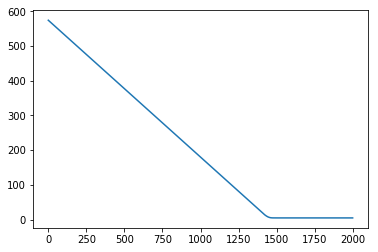

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(range(len(losses))),losses)

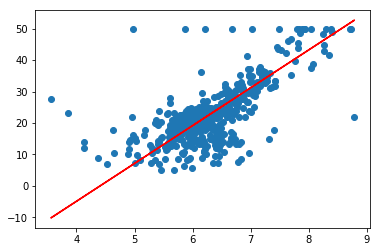

In [55]:
plt.scatter(x_rm,y)
plt.plot(x_rm, best_k * x_rm + best_b, color = 'red')

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)